In [ ]:
#Description: This is a python program for finance. It shows how to commpute portfolio simple returns, get daily returns and volatility etc.

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#Get the stock symbols for the portfolio
#FAANG
stockSymbols=['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

#Get stock starting date
stockStartDate = '2013-01-01'

In [ ]:
#Get todays date and format it in the form YYYY-mm-dd
today=datetime.today().strftime('%Y-%m-%d')
print(today)

2020-07-29


In [ ]:
#Get the number of assets int the portfolio
numAssets=len(stockSymbols)
print('You have'+str(numAssets)+' Assets in your portfolio')

You have5 Assets in your portfolio


In [ ]:
#Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks=stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
  data=web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data

In [ ]:
#Get portfolio adjusted close price
my_stocks = getMyPortfolio(stockSymbols)

In [ ]:
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-07-23,232.600006,2986.550049,371.380005,477.579987,1515.680054
2020-07-24,230.710007,3008.909912,370.459991,480.450012,1511.869995
2020-07-27,233.500000,3055.209961,379.239990,495.649994,1530.199951


In [ ]:
#Create a function to visualize the portfolio
def showGraph(stocks=stockSymbols, start=stockStartDate, end=today, col='Adj Close'):

  #create a title for the portfolio
  title='Portfolio '+col+' Price History'

  #Get the stocks
  my_stocks=getMyPortfolio(stocks=stocks, start=start, end=end, col=col)

  #Give the figure size
  plt.figure(figsize=(12.2,4.5))

  #Loop through each stock and plot the price
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)

  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(col+'Adj Close Price USD($)', fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()

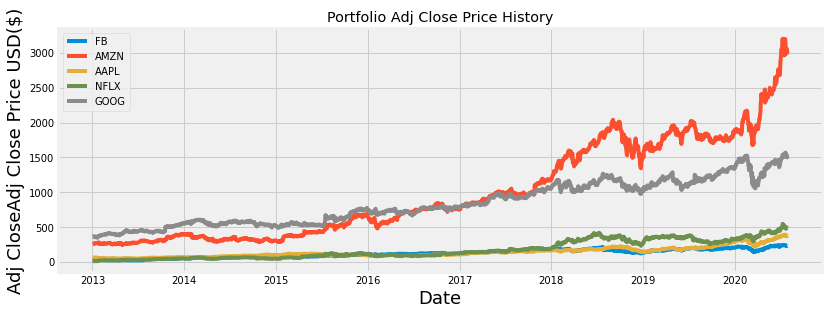

In [ ]:
#Show adjusted close price for FAANG
showGraph(stockSymbols)

In [ ]:
#Calculate the simple returns
daily_simple_returns=my_stocks.pct_change()

#Show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-07-23,-0.030308,-0.036569,-0.045516,-0.024989,-0.033669
2020-07-24,-0.008126,0.007487,-0.002477,0.006010,-0.002514
2020-07-27,0.012093,0.015388,0.023700,0.031637,0.012124


In [ ]:
#Show stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.505463,0.437271,0.348175,0.565135
AMZN,0.505463,1.000000,0.430036,0.440743,0.605361
AAPL,0.437271,0.430036,1.000000,0.253295,0.535110
NFLX,0.348175,0.440743,0.253295,1.000000,0.418293
GOOG,0.565135,0.605361,0.535110,0.418293,1.000000


In [ ]:
#Show the covarriance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000462,0.000208,0.000164,0.000217,0.000195
AMZN,0.000208,0.000368,0.000144,0.000246,0.000187
AAPL,0.000164,0.000144,0.000304,0.000128,0.000150
NFLX,0.000217,0.000246,0.000128,0.000844,0.000195
GOOG,0.000195,0.000187,0.000150,0.000195,0.000258


In [ ]:
#Show the variance
daily_simple_returns.var()

Symbols
FB      0.000462
AMZN    0.000368
AAPL    0.000304
NFLX    0.000844
GOOG    0.000258
dtype: float64

In [ ]:
#Print the standard deviation for daily simple returns
print('The stock volatility: ')
daily_simple_returns.std()

The stock volatility: 


Symbols
FB      0.021486
AMZN    0.019185
AAPL    0.017426
NFLX    0.029044
GOOG    0.016065
dtype: float64

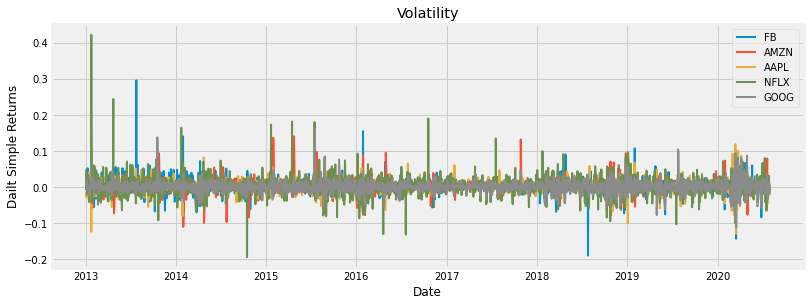

In [ ]:
#Visualize the stocks daily simple returns
plt.figure(figsize=(12,4.5))

#Loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)

#Create a legend
plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show()

In [ ]:
#Show mean of the daily simple returns
dailyMeanSimpleReturns=daily_simple_returns.mean()
print(dailyMeanSimpleReturns)

Symbols
FB      0.001337
AMZN    0.001476
AAPL    0.001048
NFLX    0.002303
GOOG    0.000882
dtype: float64


In [ ]:
#Calculate expected portfolio daily return
randomWeights=np.array([0.4,0.1,0.3,0.1,0.1])
portfolioSimpleReturn=np.sum(dailyMeanSimpleReturns*randomWeights)

#Print daily expected portfolio returns
print('The daily expected portfolio return: '+str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0013151583978113035


In [ ]:
#Get the yearly simple return
print('Expected annualised portfolio simple return: '+str(portfolioSimpleReturn*(253)))

Expected annualised portfolio simple return: 0.3327350746462598


In [ ]:
#Calculate the growth of the investment
dailyCumulSimpleReturn=(daily_simple_returns+1).cumprod()

#Show the cumulative siimple returns
dailyCumulSimpleReturn


Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987377,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896
...,...,...,...,...,...
2020-07-23,8.307143,11.606817,5.421439,36.333657,4.207013
2020-07-24,8.239643,11.693716,5.408009,36.552005,4.196438
2020-07-27,8.339286,11.873654,5.536180,37.708400,4.247316


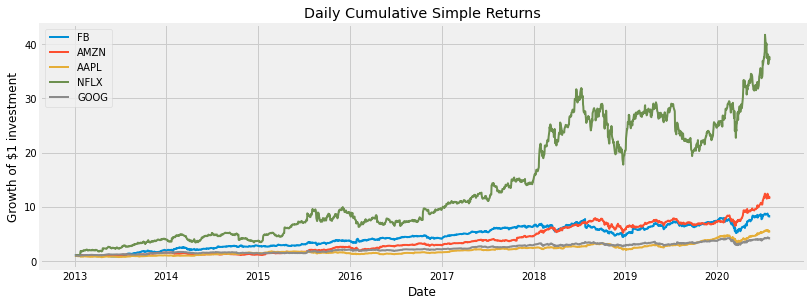

In [ ]:
#visualize the daily cumulative simple returns
plt.figure(figsize=(12.2, 4.5))
for c in daily_simple_returns.columns.values:
  plt.plot(dailyCumulSimpleReturn.index, dailyCumulSimpleReturn[c], lw=2, label=c)

plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()
